# 기초 회귀 분석

[공공데이터 포털](https://www.data.go.kr/index.do)  
[국가데이터 포털](http://kosis.kr/index/index.do;jsessionid=scj4MBBcLckIlSdvyCGUz5NbVjZw1iImrtabzwXaOV87aNPoV2evvfX059UazXWa.STAT_WAS2_servlet_engine1)   
[통계청](http://kostat.go.kr/portal/korea/index.action)   
[Kaggle Datasets](https://www.kaggle.com/datasets)

<a id= '0'></a>

## Table of contents    
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

<a id= '1'></a>

## [키와 몸무게의 상관 관계](#0)

### 필요한 library 임포트

In [1]:
# 필요한 library 임포트
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
import warnings

warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

### 데이터 불러오기 및 전처리

In [5]:
df = pd.read_csv('./student.csv', engine = 'python')

In [6]:
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          9686 non-null   object 
 1   최종가중치       9686 non-null   float64
 2   학교ID        9686 non-null   object 
 3   도시규모        9686 non-null   object 
 4   도시규모별분석용    9686 non-null   object 
 5   학년도         9686 non-null   int64  
 6   광역시도        9686 non-null   object 
 7   시도별         9686 non-null   object 
 8   학교급별        9686 non-null   int64  
 9   학교명         9686 non-null   object 
 10  공학여부        9686 non-null   object 
 11  학년          9686 non-null   int64  
 12  반           9686 non-null   int64  
 13  성별          9686 non-null   object 
 14  건강검진일       9686 non-null   int64  
 15  키           9686 non-null   float64
 16  몸무게         9682 non-null   float64
 17  혈당식전mgdl    338 non-null    float64
 18  총콜레스테롤mgdl  339 non-null    float64
 19  ASTUL       336 non-null   

In [8]:
df.describe()

,최종가중치,학년도,학교급별,학년,반,건강검진일,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,수축기,이완기
count,9686.000000,9686.0,9686.000000,9686.000000,9686.000000,9.686000e+03,9686.000000,9682.000000,338.00000,339.000000,336.000000,337.000000,578.000000,3025.000000,3025.000000
mean,104.894487,2015.0,1.995767,2.567933,2.659096,2.015047e+07,154.564444,50.207591,92.14497,173.516519,27.824405,30.311573,12.976990,104.830083,62.987438
std,39.376988,0.0,0.856499,1.414243,2.601067,1.014788e+02,16.968590,17.075953,10.49571,32.567571,19.327395,32.191960,1.092454,12.661348,7.948402
min,23.325794,2015.0,1.000000,1.000000,1.000000,2.015023e+07,107.700000,15.900000,65.00000,102.000000,11.000000,8.000000,9.000000,65.000000,23.000000
25%,76.966829,2015.0,1.000000,1.000000,1.000000,2.015041e+07,142.000000,37.200000,85.00000,148.500000,19.000000,14.000000,12.400000,98.000000,60.000000
50%,99.963287,2015.0,2.000000,2.000000,1.000000,2.015043e+07,158.700000,50.700000,91.00000,170.000000,24.000000,20.000000,13.200000,105.000000,62.000000
75%,133.231158,2015.0,3.000000,3.000000,3.000000,2.015051e+07,167.200000,60.600000,99.00000,191.000000,30.000000,32.000000,13.675000,112.000000,69.000000
max,248.300844,2015.0,3.000000,6.000000,15.000000,2.015091e+07,194.200000,130.700000,132.00000,300.000000,186.000000,272.000000,15.700000,180.000000,98.000000


### 키, 몸무게를 제외한 나머지 columns 지우기

In [9]:
data = df.loc[:,['키','몸무게']]

In [10]:
data.head()

,키,몸무게
0,125.8,27.3
1,124.3,25.4
2,119.2,23.5
3,115.0,20.0
4,120.0,33.5


In [11]:
data.isnull().sum()

키      0
몸무게    4
dtype: int64

In [12]:
data.dropna(inplace=True)
print(data.isnull().sum())

키      0
몸무게    0
dtype: int64


In [13]:
height = data['키']
weight = data['몸무게']

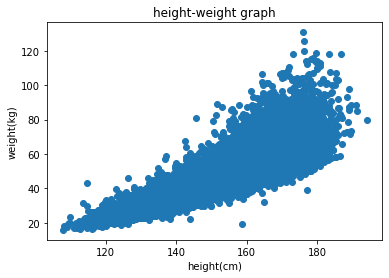

In [14]:
plt.plot(height, weight, 'o')
plt.title('height-weight graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Linear regression using statsmodels.api

In [17]:
height.head(5)

0    125.8
1    124.3
2    119.2
3    115.0
4    120.0
Name: 키, dtype: float64

In [18]:
# ols 사용
# ordinary least squares

# stats 모델에서 bias를 사용하려면 constant를 추가해서 모델링을 해줘야 함.
height1 = sm.add_constant(height, has_constant='add')
height1.head(5)

,const,키
0,1.0,125.8
1,1.0,124.3
2,1.0,119.2
3,1.0,115.0
4,1.0,120.0


In [19]:
lm = sm.OLS(weight, height1)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    몸무게   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.499e+04
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:12:52   Log-Likelihood:                -35036.
No. Observations:                9682   AIC:                         7.008e+04
Df Residuals:                    9680   BIC:                         7.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.8267      0.840    -97.388      0.000     -83.474     -80.180
키              0.8542      0.005    158.088      0.000       0.844       0.865
==============================================================================
Omnibus:                     2123.133   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5777.039
Skew:                           1.169   Prob(JB):                         0.00
Kurtosis:                       5.975   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 결과 해석   
1. $weight = -81.8267 + 0.8542 \times height$   
2. $R^2 = 0.72$   
3. $p-values = 0$

### Linear regression using scikit-learn

In [20]:
rl = LinearRegression()

In [21]:
try:
    rl.fit(height, weight) 
except:
    print('모델 학습에 에러 발생!')
    print(height.values.shape)

모델 학습에 에러 발생!
(9682,)


In [22]:
height.values[:,np.newaxis]
height.to_numpy()[:,np.newaxis],weight
height.values.reshape(-1,1), weight

(array([[125.8],
        [124.3],
        [119.2],
        ...,
        [169.5],
        [159.2],
        [162. ]]),
 0       27.3
 1       25.4
 2       23.5
 3       20.0
 4       33.5
         ... 
 9681    50.4
 9682    88.8
 9683    63.2
 9684    52.9
 9685    67.7
 Name: 몸무게, Length: 9682, dtype: float64)

In [23]:
# X데이터가 2차원 array형태여야 하기 때문에 height의 차원을 추가해줌.
rl.fit(height.values[:,np.newaxis], weight)
# 또는 rl.fit(height.to_numpy()[:,np.newaxis],weight)
# 또는 rl.fit(height.values.reshape(-1,1), weight) 사용 가능.

LinearRegression()

In [24]:
print('기울기: ',rl.coef_[0])
print('절편:', rl.intercept_)

기울기:  0.8542323795602202
절편: -81.82669252685574


In [25]:
rl.predict([[180]])
# 키가 180cm인 사람 몸무게 예측

array([71.93513579])

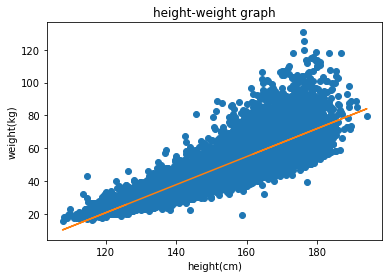

In [26]:
plt.plot(height, weight, 'o')
plt.plot(height,rl.predict(height.values.reshape(-1,1)))
plt.title('height-weight graph')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

### 결정 계수 $R^2$   
$R^2 = 1-{SS_{RES} \over SS_{TOT}}=1-{\Sigma_{i}(y_{i}-\hat{y_{i}})^{2} \over \Sigma_{i}(y_{i}-\bar{y_{i}})^{2} }$

In [27]:
predict = rl.predict(height.values.reshape(-1,1))
r2 = 1 - ((weight - predict)**2).sum() / ((weight - weight.mean())**2).sum()
print(f'R^2: {r2:.4f}')

R^2: 0.7208


### MSE (Mean Squared Error)

$MSE = {1 \over n} \Sigma_{i}^{n} (y_{i}-\hat{y_{i}})^{2}$   
$n$ : the number of observations in the test set   
$y_{i}$ : actual values   
$\hat{y_{i}}$ : predicted values     


In [28]:
mse = np.mean((weight - predict)**2)
print(f'MSE: {mse:.4f}')

MSE: 81.3998


[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

---

<a id= '2'></a>

## [실습: 보스톤 집값 예측 모델](#0)

#### 주택당 방 수(RM) 데이터를 가지고 집값 예측하는 선형 회귀모형 만들어보기
- 기울기, 절편
- $R^2$, $MSE$

In [29]:
boston = pd.read_csv("./Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


### 데이터 설명
타겟 데이터   
1978 보스턴 주택 가격   
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)   

|특징 데이터||
|------|---|
|CRIM|범죄율|
|INDUS|비소매상업지역 면적 비율|
|NOX|일산화질소 농도|
|RM|주택당 방 수|
|LSTAT|인구 중 하위 계층 비율|
|B|인구 중 흑인 비율|
|PTRAT|학생/교사 비율|
|ZN|25,000 평방피트를 초과 거주지역 비율|
|CHAS|찰스강의 경계에 위치한 경우는 1, 아니면 0|
|AGE|1940년 이전에 건축된 주택의 비율|
|RAD|방사형 고속도로까지의 거리|
|DIS|직업센터의 거리|
|TAX|재산세율|
  

In [30]:
# Target 및 independent variable 셋팅
# 예시로서'RM'(주택 당 방 수) 사용
price = boston[['Target']]
RM  = boston[['RM']]

In [37]:
price.shape

(506, 1)

In [38]:
RM.shape

(506, 1)

In [43]:
# 모델 생성 price ~ RM
rl = LinearRegression()
# 모델을 학습시켜주세요. hint: ?.fit(?,?)
rl.fit(RM, price)

LinearRegression()

In [44]:
print(f'기울기: {rl.coef_[0][0]:.4f}')
print(f'절편: {rl.intercept_[0]:.4f}' )

기울기: 9.1021
절편: -34.6706


In [46]:
price_hat =  rl.predict(RM)# RM에 대해 모델의 예측값을 구해주세요.
print(f'R^2: {rl.score(RM, price):.4f}')
print(f'MSE: {mean_squared_error(price,price_hat):.4f}')

R^2: 0.4835
MSE: 43.6006


[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

<a id= '3'></a>

---

## [Multiple regression](#0)

In [48]:
df = pd.read_csv('energy_dataset.csv')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [49]:
# 참고:
# time에 대한 데이터 타입 = object
# 시계열 분석을 위해서 데이터 타입을 바꿔줘야함.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [50]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [51]:
df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True)

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [56]:
# 참고: 데이터 타입 확인
# pandas, numpy
# 1) pandas 객체
X = df.loc[:,['total load actual','price day ahead']] # 2개 데이터
y = df.loc[:,'price actual']
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,total load actual,price day ahead
0,25385.0,50.10
1,24382.0,48.10
2,22734.0,47.33
3,21286.0,42.27
4,20264.0,38.41


In [57]:
# 2) numpy 객체
X = X.values
y = y.values
print(type(X))
X

<class 'numpy.ndarray'>


array([[25385.  ,    50.1 ],
       [24382.  ,    48.1 ],
       [22734.  ,    47.33],
       ...,
       [28071.  ,    66.88],
       [25801.  ,    63.93],
       [24455.  ,    64.27]])

### 회귀 모델 생성

In [58]:
mul_reg = LinearRegression()
mul_reg.fit(X,y)

LinearRegression()

In [59]:
print('기울기: ',mul_reg.coef_)
print('절편:', mul_reg.intercept_)

기울기:  [3.53417224e-04 6.59637935e-01]
절편: 14.849636913946462


In [60]:
y_hat = mul_reg.predict(X)

In [61]:
print('R^2: ', mul_reg.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.5480997942859913
MSE:  90.99378726695268


[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

---

<a id= '4'></a>

## [실습: winearoma 데이터셋에 대해서 모형 학습하고 R^2, MSE 계산](#0)

In [62]:
def print_summary(model, X, y, features, plot= False):
    s = pd.DataFrame({'coefficients':model.coef_})
    s.index = features
    print(s)
    print()
    if plot:
        s.plot(kind= 'barh')
        plt.show()
    
    print(f'절편: {model.intercept_:.4f}')
    print(f'R^2: {model.score(X,y):.4f}')
    y_hat = model.predict(X)
    print(f'MSE: {mean_squared_error(y_hat,y):.4f}')

### sklearn 사용

In [75]:
wine = pd.read_excel('wine_aroma.xlsx')
wine.head()

,Mo,Ba,Cr,Sr,Pb,B,Mg,Ca,K,Aroma
0,0.044,0.387,0.029,1.230,0.561,2.63,128.0,80.5,1130,3.3
1,0.160,0.312,0.038,0.975,0.697,6.21,193.0,75.0,1010,4.4
2,0.146,0.308,0.035,1.140,0.730,3.05,127.0,91.0,1160,3.9
3,0.191,0.165,0.036,0.927,0.796,2.57,112.0,93.6,924,3.9
4,0.363,0.380,0.059,1.130,1.730,3.07,138.0,84.6,1090,5.6


In [95]:
Input_wine = wine.iloc[:, :-1]         # 독립 변수를 numpy 객체에 저장해주세요. 
Output_wine = wine.iloc[:, -1]        # 종속 변수를 numpy 객체에 저장해주세요. 

In [135]:
type(wine.iloc[:, -1:])

pandas.core.frame.DataFrame

In [136]:
type(wine.iloc[:, -1])

pandas.core.series.Series

In [96]:
Output_wine

0     3.3
1     4.4
2     3.9
3     3.9
4     5.6
5     4.6
6     4.8
7     5.3
8     4.3
9     4.3
10    5.1
11    3.3
12    5.9
13    7.7
14    7.1
15    5.5
16    6.3
17    5.0
18    4.6
19    6.4
20    5.5
21    4.7
22    4.1
23    6.0
24    4.3
Name: Aroma, dtype: float64

In [153]:
mul_reg2 = LinearRegression()           # 선형 회귀 모델을 선언해주세요.
mul_reg2.fit(Input_wine, wine.iloc[:, -1:])           # mul_reg2를 학습시켜 주세요. # hint: mul_reg2.fit(?,?)

LinearRegression()

In [159]:
mul_reg2.coef_

array([[ 7.91277584e+00,  1.67032230e+00, -1.81369288e+01,
        -1.56427971e+00, -2.53866832e-01,  9.60786667e-02,
         4.97181435e-04, -3.50428862e-02,  1.39771428e-03]])

In [155]:
np.shape(mul_reg2.coef_)

(1, 9)

In [98]:
print('기울기: ',mul_reg.coef_)
print('절편:', mul_reg.intercept_)

기울기:  [3.53417224e-04 6.59637935e-01]
절편: 14.849636913946462


In [161]:
s = pd.DataFrame( mul_reg2.coef_)

In [162]:
s

,0,1,2,3,4,5,6,7,8
0,7.912776,1.670322,-18.136929,-1.56428,-0.253867,0.096079,0.000497,-0.035043,0.001398


In [158]:
mul_reg.coef_

array([3.53417224e-04, 6.59637935e-01])

In [102]:
try:
    print_summary(mul_reg2, Input_wine, Output_wine, features= wine.columns.drop('Aroma'))
except:
    print('please fit the model first..')

    coefficients
Mo      7.912776
Ba      1.670322
Cr    -18.136929
Sr     -1.564280
Pb     -0.253867
B       0.096079
Mg      0.000497
Ca     -0.035043
K       0.001398

절편: 6.2003
R^2: 0.8354
MSE: 0.1934


### stats.api 사용

In [109]:
Input_wine1= wine.iloc[:,:-1]
Output_wine1 = wine.iloc[:,-1]

In [110]:
Input_wine1 = sm.add_constant(Input_wine1, has_constant='add')# 독립 변수에 constant를 추가해주세요.

# sm.OLS를 이용해서 모델을 학습시키고 결과를 출력해주세요.
lm = sm.OLS(Output_wine1, Input_wine1)# hint: sm.OLS(?,?) 
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Aroma   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     8.462
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           0.000187
Time:                        13:42:43   Log-Likelihood:                -14.934
No. Observations:                  25   AIC:                             49.87
Df Residuals:                      15   BIC:                             62.06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2003      0.948      6.539      0.000       4.179       8.221
Mo             7.9128      5.481      1.444      0.169      -3.770      19.596
Ba             1.6703      2.608      0.640      0.532      -3.889       7.230
Cr           -18.1369     10.976     -1.652      0.119     -41.532       5.259
Sr            -1.5643      0.862     -1.814      0.090      -3.402       0.274
Pb            -0.2539      1.280     -0.198      0.845      -2.983       2.475
B              0.0961      0.118      0.815      0.428      -0.155       0.347
Mg             0.0005      0.008      0.066      0.949      -0.016       0.017
Ca            -0.0350      0.011     -3.295      0.005      -0.058      -0.012
K              0.0014      0.001      0.990      0.338      -0.002       0.004
==============================================================================
Omnibus:                        2.517   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.164
Skew:                           0.637   Prob(JB):                        0.339
Kurtosis:                       2.325   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 이상치 제거만 해도 성능을 높일 수 있다.

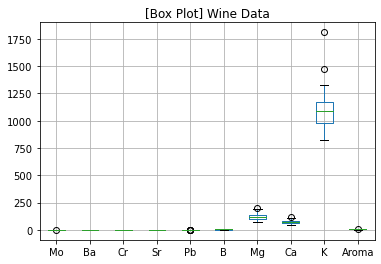

In [111]:
boxplot = wine.boxplot()
plt.title('[Box Plot] Wine Data')
plt.show()
# feature K has outlier whose values are higher than about 1300

In [112]:
not_outlier = wine['K'] < 1300
wine2 = wine.loc[not_outlier,:]

Input_wine2= wine2.iloc[:,:-1]
Output_wine2 = wine2.iloc[:,-1]

In [130]:
Output_wine2

array([3.3, 4.4, 3.9, 3.9, 5.6, 4.6, 4.8, 5.3, 4.3, 4.3, 5.1, 5.9, 7.7,
       7.1, 5.5, 6.3, 5. , 4.6, 6.4, 5.5, 4.7, 6. ])

In [113]:
Input_wine2= Input_wine2.values
Output_wine2 = Output_wine2.values

In [114]:
mul_reg3 = LinearRegression()
mul_reg3.fit(Input_wine2,Output_wine2)

LinearRegression()

In [115]:
print_summary(mul_reg3, Input_wine2, Output_wine2, features= wine.columns.drop('Aroma'))

    coefficients
Mo     10.291818
Ba      8.417703
Cr    -23.717778
Sr     -3.217011
Pb     -0.800144
B       0.208273
Mg     -0.009768
Ca     -0.013974
K       0.001189

절편: 5.6245
R^2: 0.8548
MSE: 0.1612


[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

---

<a id= '5'></a>

## [데이터 시각화](#0)

<Figure size 432x288 with 0 Axes>

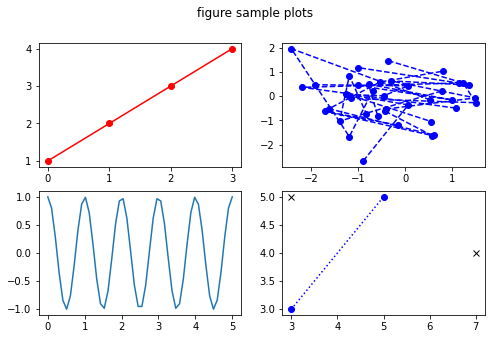

In [116]:
fig = plt.figure()

fig, ax = plt.subplots(2, 2, figsize=(8,5))
# Create 2 by 2 subplots

fig.suptitle('figure sample plots')
ax[0][0].plot([1,2,3,4], 'ro-')
ax[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax[1][1].plot([3,5], [3,5], 'bo:')
ax[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [117]:
# matplotlib.pyplot 임포트
import matplotlib.pyplot as plt

In [118]:
# Series를 통한 line plot 그리기
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     1.414377
10    1.926775
20    2.414257
30    2.118252
40    0.826756
50    1.849010
60    0.687918
70    1.538506
80    2.277814
90    2.487434
dtype: float64

<AxesSubplot:>

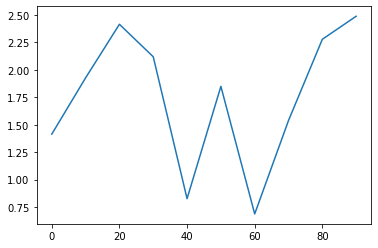

In [120]:
# 위에서 정의한 s라는 시리즈에 대해서 line plot을 그리고 싶다면?
s.plot()

In [124]:
# DataFrame을 통한 line plot 그리기
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.187607,-0.052693,2.138255,-0.548518
10,0.174996,0.093379,2.113647,-0.021195
20,1.050743,0.266749,1.340721,-1.181723
30,1.647752,0.905123,0.396267,-2.294030
40,1.844953,1.722894,-1.861522,-2.046791
50,2.861890,1.443741,-3.609298,-4.127117
60,3.813881,0.428681,-2.653262,-3.427948
70,5.803235,-0.176432,-3.890363,-3.461186
80,5.932196,0.941739,-4.447306,-5.351328
90,6.031556,2.248685,-3.405118,-4.622240


<AxesSubplot:>

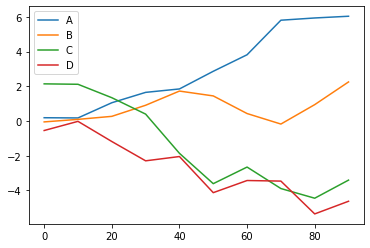

In [125]:
df.plot()

<AxesSubplot:>

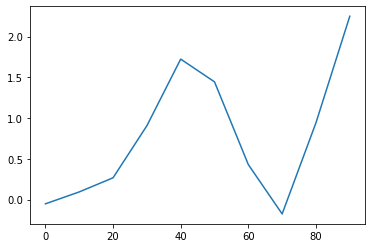

In [126]:
# 하나의 열에 대해서만 보고 싶다면?
df['B'].plot()

In [127]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.855511
b    0.913910
c    0.811868
d    0.112191
e    0.337186
f    0.266072
g    0.050842
h    0.760579
i    0.044981
j    0.906554
k    0.982464
l    0.720329
m    0.722143
n    0.015628
o    0.396933
p    0.832727
dtype: float64

<AxesSubplot:>

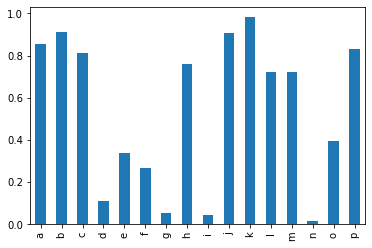

In [128]:
s2.plot(kind='bar')

<AxesSubplot:>

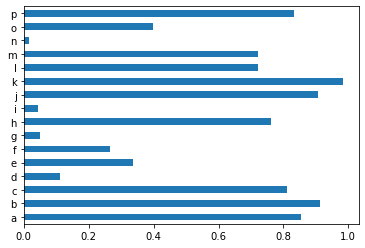

In [129]:
# 가로방향의 bar plot그리기
s2.plot(kind='barh')

In [145]:
df2 = pd.DataFrame(np.random.rand(6, 4), 
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

Genus,A,B,C,D
one,0.659465,0.681310,0.490516,0.425220
two,0.249982,0.500245,0.441289,0.150586
three,0.414399,0.020176,0.134608,0.864118
four,0.191481,0.749832,0.978857,0.971608
five,0.872843,0.014585,0.475808,0.693958
six,0.461737,0.628323,0.599590,0.004665


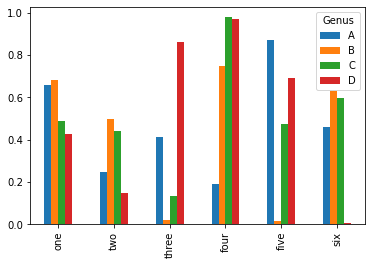

In [146]:
df2.plot(kind='bar')

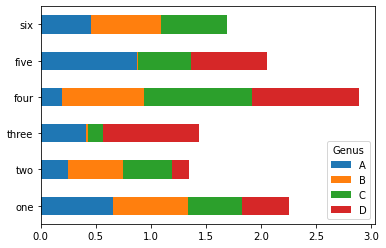

In [147]:
df2.plot(kind='barh', stacked=True)
# stacked 속성을 true로 설정하면, 각 열의 값을 한줄로 쌓아서 나타내준다.

In [148]:
# histogram은 index가 필요없다.
s3 = pd.Series(np.random.normal(0, 1, size=200))
s3

0      0.849868
1     -1.474049
2     -1.523529
3     -1.273200
4     -1.801977
         ...   
195    0.691116
196   -0.696167
197    2.289119
198   -0.758881
199    0.676464
Length: 200, dtype: float64

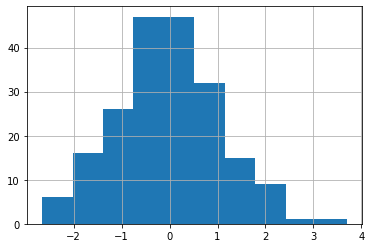

In [149]:
s3.hist()

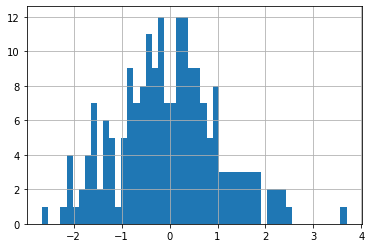

In [150]:
s3.hist(bins=50)
# x축 구간 갯수를 bin이라고 하는데, 이는 직접 설정할 수 있다.

---

[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

<a id= '6'></a>

## [Train test split and evaluation](#0)

![ex_screenshot](./ee.png)

In [163]:
from sklearn.model_selection import train_test_split

### 지금까지 해왔던 방법

In [164]:
df = pd.read_csv('energy_dataset.csv')
df.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'], inplace=True)
df.dropna(inplace=True)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [165]:
Num_obs = df.shape[0]
print(Num_obs)

35017


In [166]:
Input = df.loc[:,'generation biomass':'generation wind onshore'] # 20개 컬럼 데이터
Output =  df.loc[:,'price actual']

In [167]:
# pandas -> numpy
Input_np = Input.values
Output_np = Output.values

In [168]:
lr2= LinearRegression()
lr2.fit(Input_np, Output_np)

Output_np_hat = lr2.predict(Input_np)

                                             coefficients
generation biomass                           2.725536e-02
generation fossil brown coal/lignite        -1.670623e-05
generation fossil coal-derived gas          -1.301043e-16
generation fossil gas                        1.279630e-03
generation fossil hard coal                  2.195000e-03
generation fossil oil                       -1.075096e-02
generation fossil oil shale                 -1.873501e-16
generation fossil peat                      -2.142383e-16
generation geothermal                       -2.879641e-16
generation hydro pumped storage consumption -3.080578e-03
generation hydro run-of-river and poundage   1.502720e-03
generation hydro water reservoir             4.320323e-04
generation marine                            0.000000e+00
generation nuclear                           1.373705e-04
generation other                             4.362673e-02
generation other renewable                   3.047274e-01
generation sol

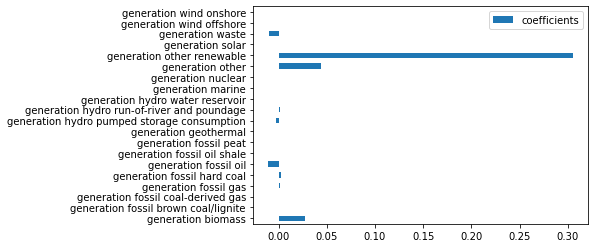

절편: 3.3418
R^2: 0.3763
MSE: 125.5828


In [169]:
print_summary(lr2, Input_np, Output_np, Input.columns, plot= True)

### 문제점?
- 그래서 모델이 unseen data에 대해서도 잘 설명할 것인지?
$\to$ train test split!

In [175]:
# train: test = 8:2 
X_train, X_test, y_train, y_test = train_test_split(Input_np,
                                                    Output_np,
                                                    test_size=0.2,
                                                    random_state=1004)

In [176]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (28013, 20)
X_test shape: (7004, 20)
y_train shape: (28013,)
y_test shape: (7004,)


In [177]:
# train set만을 이용해서 모형 학습
lr2= LinearRegression()
lr2.fit(X_train, y_train)
# train set에서의 성능
y_train_hat = lr2.predict(X_train)
print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
print('train셋 R^2: ', lr2.score(X_train, y_train))
# test set에서의 성능
y_test_hat = lr2.predict(X_test)
print('*' *30)
print('test셋 MSE: ', mean_squared_error(y_test,y_test_hat))

train셋 MSE:  124.44428476904481
train셋 R^2:  0.3787270334716948
******************************
test셋 MSE:  130.1895209118101


[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

---

<a id= '7'></a>

## [실습 - winearoma 데이터셋에 대해서 train과 test set 에러를 계산하기](#0)

test set: 0.3

In [186]:
# x데이터: Input_wine
# y데이터: Output_wine
try:
    X_train, X_test, y_train, y_test = train_test_split(Input_np,
                                                        Output_np,
                                                        test_size=0.3,
                                                        random_state=1004) # train 과 test의 비율을 7:3으로 데이터를 나눠주세요
except:
    print('train 과 test의 비율을 7:3으로 데이터를 나눠주세요')

In [187]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (24511, 20)
X_test shape: (10506, 20)
y_train shape: (24511,)
y_test shape: (10506,)


In [189]:
try:
    # train set만을 이용해서 아래 'rl'을 학습시켜주세요
    rl= LinearRegression()
    # hint: ?.fit(?,?)
    rl.fit(X_train, y_train)
except:
    print('train set만을 이용해서 모형 학습시켜주세요.')    
# train set에서의 성능 확인
y_train_hat = rl.predict(X_train)
print('train셋 MSE: ', mean_squared_error(y_train,y_train_hat))
print('train셋 R^2: ', rl.score(X_train, y_train))
# test set에서의 성능
y_test_hat = rl.predict(X_test)
print('*' *30)
print('test셋 MSE: ', mean_squared_error(y_test,y_test_hat))


train셋 MSE:  123.57306418880893
train셋 R^2:  0.38248351540744263
******************************
test셋 MSE:  130.36435706471948


![ex_screenshot](./train,test.png)

[contents index]
1. [키와 몸무게의 상관 관계](#1)   
2. [실습: 보스톤 집값 예측 모델](#2)  
3. [Multiple Regression](#3)
4. [실습: winearoma 데이터셋](#4)
5. [데이터 시각화](#5)
6. [Train test set split and evaluation](#6)
7. [실습: winearoma 데이터셋에 대해 train과 test 에러 계산하기](#7)   
8. [Cross validation 이용](#8)

---

<a id= '8'></a>

## [Cross validation 이용](#0)

![ex_screenshot](./dd.png)

In [219]:
from sklearn.model_selection import KFold

In [220]:
# cross validation 예제
idx = np.arange(10)
kf2 = KFold(n_splits=5, shuffle=False)
for fold,(idx_train, idx_test) in enumerate(kf2.split(idx)):
    print('fold:',fold)
    print("idx train:",idx_train, "idx test:",idx_test)
    

fold: 0
idx train: [2 3 4 5 6 7 8 9] idx test: [0 1]
fold: 1
idx train: [0 1 4 5 6 7 8 9] idx test: [2 3]
fold: 2
idx train: [0 1 2 3 6 7 8 9] idx test: [4 5]
fold: 3
idx train: [0 1 2 3 4 5 8 9] idx test: [6 7]
fold: 4
idx train: [0 1 2 3 4 5 6 7] idx test: [8 9]


In [196]:
from sklearn.model_selection import cross_val_score

In [197]:
?cross_val_score

In [198]:
score = cross_val_score(rl, Input_np, Output_np, cv=5 , scoring='neg_mean_squared_error')
print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [-212.99344336 -347.39875488 -130.18307675  -97.00602282 -189.28840681]
cross validataion average score:  -195.37394092623248


#### 실습: winearoma 데이터셋에 대해서 cross validation을 3번반복 했을때 test error 계산하기

In [192]:
rl, Input_wine, Output_wine

(LinearRegression(),
        Mo     Ba     Cr     Sr     Pb     B     Mg     Ca     K
 0   0.044  0.387  0.029  1.230  0.561  2.63  128.0   80.5  1130
 1   0.160  0.312  0.038  0.975  0.697  6.21  193.0   75.0  1010
 2   0.146  0.308  0.035  1.140  0.730  3.05  127.0   91.0  1160
 3   0.191  0.165  0.036  0.927  0.796  2.57  112.0   93.6   924
 4   0.363  0.380  0.059  1.130  1.730  3.07  138.0   84.6  1090
 5   0.106  0.275  0.019  1.050  0.491  6.56  172.0  112.0  1290
 6   0.479  0.164  0.062  0.823  2.060  4.57  179.0  122.0  1170
 7   0.234  0.271  0.044  0.963  1.090  3.18  145.0   91.9  1020
 8   0.058  0.225  0.022  1.130  0.048  6.13  113.0   70.2  1240
 9   0.074  0.329  0.030  1.070  0.552  3.30  140.0   74.7  1100
 10  0.071  0.105  0.028  0.491  0.310  6.56  103.0   67.9  1090
 11  0.147  0.301  0.087  2.140  0.546  3.50  199.0   66.3  1470
 12  0.116  0.166  0.041  0.578  0.518  6.43  111.0   83.8  1120
 13  0.166  0.132  0.026  0.229  0.699  7.27  107.0   44.9   854
 14 

In [199]:
# cross_val_score()함수를 이용해서 3-fold validation을 구해보세요.
# scoring='neg_mean_squared_error

score = cross_val_score(rl, Input_wine, Output_wine, cv=3 , scoring='neg_mean_squared_error')
print('cross validation score: ', score)
print('cross validataion average score: ', score.mean())

cross validation score:  [-0.51044519 -0.77951615 -0.41157738]
cross validataion average score:  -0.567179569427423


[return to the 'Table of contents'](#0)

## 다음 시간

> 변수 선택   
정규화  
$adjusted R^2$   
명목형 변수 처리 ...
